## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import sqlite3
import zipfile

In [3]:
# Extract IMDb SQL .db file
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    # Extract all contents of .zip file into current directory
    zipObj.extractall(path='./zippedData/')
    
# Create connection to IMDb DB
con = sqlite3.connect('./zippedData/im.db')


In [4]:
# con = sqlite3.connect("zippedData/im.db/im.db")
# cursor = con.cursor()

In [5]:
schema_df = pd.read_sql("""
        SELECT *
        FROM sqlite_master """, con)

In [6]:
# Understanding the structure of the database
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [7]:
# Looking at movie_basics
pd.read_sql(""" 
            SELECT * 
            FROM movie_basics
            LIMIT 2
            """, con)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [8]:
# Looking at movie_ratings
pd.read_sql(""" 
            SELECT *
            FROM movie_ratings
            LIMIT 2
            """, con)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [9]:
# inner joining movie_ratings and movie_basics
df_combined = pd.read_sql(""" 
            SELECT *
            FROM movie_ratings
            JOIN movie_basics
            ON movie_basics.movie_id = movie_ratings.movie_id
            """, con)

In [10]:
# Checking missing values
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   movie_id         73856 non-null  object 
 4   primary_title    73856 non-null  object 
 5   original_title   73856 non-null  object 
 6   start_year       73856 non-null  int64  
 7   runtime_minutes  66236 non-null  float64
 8   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


In [11]:
# Dropping missing values in genres column
df_combined.dropna(subset = ['genres'], inplace = True)

In [12]:
df_combined.head()

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,tt1042974,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [13]:
# pulling movie_budgets csv
df_budget = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
# replacing $ and , characters in production_budget column
df_budget.production_budget = df_budget.production_budget.str.replace('$','').str.replace(',','')

# casting to integer so we can filter based on production budget is 
df_budget.production_budget = df_budget.production_budget.astype(int)
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382","$1,316,721,747"


In [15]:
# slicing out high budget films
df_high_budget = df_budget[df_budget.production_budget > 50000000]


In [16]:
# There are 16 different movies with the same title
df_high_budget[df_high_budget.duplicated(subset = ['movie'], keep = False) == True].sort_values('movie')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
297,98,"Aug 7, 2015",Fantastic Four,120000000,"$56,117,548","$167,849,187"
484,85,"Jul 8, 2005",Fantastic Four,87500000,"$154,696,080","$333,132,750"
140,41,"May 16, 2014",Godzilla,160000000,"$200,676,069","$529,076,069"
273,74,"May 19, 1998",Godzilla,125000000,"$136,314,294","$376,000,000"
383,84,"Jul 25, 2014",Hercules,100000000,"$72,688,614","$243,388,614"
707,8,"Jun 13, 1997",Hercules,70000000,"$99,112,101","$250,700,000"
650,51,"Apr 16, 1999",Life,75000000,"$64,062,587","$73,521,587"
965,66,"Mar 24, 2017",Life,58000000,"$30,234,022","$100,929,666"
38,39,"May 14, 2010",Robin Hood,210000000,"$105,487,148","$322,459,006"
408,9,"Nov 21, 2018",Robin Hood,99000000,"$30,824,628","$84,747,441"


In [17]:
# Discovering that there are about 4 thousand of non unique titles in df_combined
len(df_combined.primary_title) - len(df_combined.primary_title.unique())

3804

In [18]:
#Creating column "title_year" in table df_combined: to use it to merge tables without unnecessary data loss
df_combined['title_year'] = df_combined.apply(lambda row: row.primary_title + " " + str(row.start_year), axis=1)




In [19]:
df_combined.head(2)

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,Laiye Je Yaarian 2019
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary,Borderless 2019


In [21]:
#Creating column "title_year" in table df_high_budget: to use it to merge tables without unnecessary data loss
df_high_budget['title_year'] = df_high_budget.apply(lambda row: row.movie + row.release_date[-5:], axis=1)

<ipython-input-21-9ceda84810bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_budget['title_year'] = df_high_budget.apply(lambda row: row.movie + row.release_date[-5:], axis=1)


In [22]:
df_high_budget.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_year
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625","$2,776,345,279",Avatar 2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides 2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350","$149,762,350",Dark Phoenix 2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963",Avengers: Age of Ultron 2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi 2017


In [23]:
#cleaning columns not needed from analysis
df_combined.drop(columns=['movie_id', 'original_title', 'primary_title', 'runtime_minutes', 'start_year'], axis=1, inplace = True)

In [24]:
#cleaning columns not needed from analysis
df_high_budget.drop(columns=['id', 'release_date'], inplace = True)

C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
df_combined.title_year = df_combined.title_year.astype(str)
df_high_budget.title_year = df_high_budget.title_year.astype(str)

C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
df_combined[df_combined['title_year'] == "Avengers: Age of Ultron 2015"]

,averagerating,numvotes,genres,title_year
66768,7.3,665594,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron 2015


In [27]:
df_combined['title_year'].str.encode('utf-8')

0                                 b'Laiye Je Yaarian 2019'
1                                       b'Borderless 2019'
2                                 b'Just In\xc3\xa8s 2010'
3                           b'The Legend of Hercules 2014'
4                                 b'At\xc3\xa9 Onde? 2011'
                               ...                        
73851                                        b'Caisa 2018'
73852    b'Code Geass: Lelouch of the Rebellion - Glori...
73853                                      b'Sisters 2019'
73854                            b'The Projectionist 2019'
73855                                       b'Sathru 2019'
Name: title_year, Length: 73052, dtype: object

In [28]:
df_high_budget['title_year'].str.encode('utf-8')


0                                          b'Avatar 2009'
1       b'Pirates of the Caribbean: On Stranger Tides ...
2                                    b'Dark Phoenix 2019'
3                         b'Avengers: Age of Ultron 2015'
4               b'Star Wars Ep. VIII: The Last Jedi 2017'
                              ...                        
1076                           b'Me, Myself & Irene 2000'
1077         b'Barnyard: The Original Party Animals 2006'
1078                                        b'Alpha 2018'
1079                               b'Deck the Halls 2006'
1080                        b'The Adjustment Bureau 2011'
Name: title_year, Length: 1081, dtype: object

In [29]:
df_high_budget['title_year']

0                                            Avatar 2009
1       Pirates of the Caribbean: On Stranger Tides 2011
2                                      Dark Phoenix 2019
3                           Avengers: Age of Ultron 2015
4                 Star Wars Ep. VIII: The Last Jedi 2017
                              ...                       
1076                             Me, Myself & Irene 2000
1077           Barnyard: The Original Party Animals 2006
1078                                          Alpha 2018
1079                                 Deck the Halls 2006
1080                          The Adjustment Bureau 2011
Name: title_year, Length: 1081, dtype: object

In [32]:
df_newdata = pd.merge(df_combined, df_high_budget, how = 'inner', on='title_year')

In [36]:
df_newdata.columns

Index(['averagerating', 'numvotes', 'genres', 'title_year', 'movie',
       'production_budget', 'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [42]:
df_newdata.head()

,averagerating,numvotes,genres,title_year,movie,production_budget,domestic_gross,worldwide_gross
0,4.2,50352,"Action,Adventure,Fantasy",The Legend of Hercules 2014,The Legend of Hercules,70000000,"$18,848,538","$58,953,319"
1,4.4,69199,"Comedy,Drama,Romance",Sex and the City 2 2010,Sex and the City 2,95000000,"$95,347,692","$294,680,778"
2,7.8,387402,"Biography,Drama,Thriller",Captain Phillips 2013,Captain Phillips,55000000,"$107,136,417","$220,648,184"
3,8.0,621193,"Action,Adventure,Biography",The Revenant 2015,The Revenant,135000000,"$183,637,894","$532,938,302"
4,5.8,77709,"Drama,Romance",Eat Pray Love 2010,Eat Pray Love,60000000,"$80,574,010","$206,598,789"


In [48]:
low_ranking = df_newdata[df_newdata['averagerating'] < 6.6]

In [54]:
low_ranking = low_ranking[low_ranking['numvotes'] > 1000]

In [76]:
low_ranking.head()

,averagerating,numvotes,genres,title_year,movie,production_budget,domestic_gross,worldwide_gross
0,4.2,50352,"Action,Adventure,Fantasy",The Legend of Hercules 2014,The Legend of Hercules,70000000,"$18,848,538","$58,953,319"
1,4.4,69199,"Comedy,Drama,Romance",Sex and the City 2 2010,Sex and the City 2,95000000,"$95,347,692","$294,680,778"
4,5.8,77709,"Drama,Romance",Eat Pray Love 2010,Eat Pray Love,60000000,"$80,574,010","$206,598,789"
6,5.9,142853,"Action,Fantasy,Horror",Abraham Lincoln: Vampire Hunter 2012,Abraham Lincoln: Vampire Hunter,67500000,"$37,519,139","$137,489,730"
7,6.0,86118,"Action,Adventure,Fantasy",The Last Witch Hunter 2015,The Last Witch Hunter,80000000,"$27,367,660","$130,818,912"


In [74]:
# Finding unique genres identifiers
genres_list = list(low_ranking.genres.unique())
newlst = []
for i in genres_list:
    
    newlst.extend(i.split(','))
unique_genres = list(set(newlst))


In [83]:
low_ranking.explode('genres')

,averagerating,numvotes,genres,title_year,movie,production_budget,domestic_gross,worldwide_gross
0,4.2,50352,"Action,Adventure,Fantasy",The Legend of Hercules 2014,The Legend of Hercules,70000000,"$18,848,538","$58,953,319"
1,4.4,69199,"Comedy,Drama,Romance",Sex and the City 2 2010,Sex and the City 2,95000000,"$95,347,692","$294,680,778"
4,5.8,77709,"Drama,Romance",Eat Pray Love 2010,Eat Pray Love,60000000,"$80,574,010","$206,598,789"
6,5.9,142853,"Action,Fantasy,Horror",Abraham Lincoln: Vampire Hunter 2012,Abraham Lincoln: Vampire Hunter,67500000,"$37,519,139","$137,489,730"
7,6.0,86118,"Action,Adventure,Fantasy",The Last Witch Hunter 2015,The Last Witch Hunter,80000000,"$27,367,660","$130,818,912"
...,...,...,...,...,...,...,...,...
389,4.1,137734,"Action,Adventure,Family",The Last Airbender 2010,The Last Airbender,150000000,"$131,772,187","$319,713,881"
390,6.3,129663,"Adventure,Family,Fantasy",The Chronicles of Narnia: The Voyage of the Da...,The Chronicles of Narnia: The Voyage of the Da...,155000000,"$104,386,950","$418,186,950"
391,5.3,78287,"Action,Sci-Fi,Thriller",Geostorm 2017,Geostorm,100000000,"$33,700,160","$220,796,009"
392,6.4,81010,"Adventure,Animation,Comedy",Cloudy with a Chance of Meatballs 2 2013,Cloudy with a Chance of Meatballs 2,78000000,"$119,793,567","$274,392,649"


In [87]:
#converting column genres into a list of genre identifiers
low_ranking['genres'] = low_ranking.apply(lambda row: row.genres.split(','), axis=1)

In [92]:
#Exploding column with multiple genre identifiers into rows with single genre identifiers
low_ranking = low_ranking.explode('genres')

In [93]:
low_ranking.count()

averagerating        516
numvotes             516
genres               516
title_year           516
movie                516
production_budget    516
domestic_gross       516
worldwide_gross      516
dtype: int64

In [95]:
#converting gross columns into integer datatype
low_ranking.domestic_gross = low_ranking.domestic_gross.str.replace('$','').str.replace(',','')
# replacing $ and , characters in production_budget column
low_ranking.worldwide_gross = low_ranking.worldwide_gross.str.replace('$','').str.replace(',','')

# casting to integer so we can filter based on production budget is 
low_ranking.domestic_gross = low_ranking.domestic_gross.astype(int)
low_ranking.worldwide_gross = low_ranking.worldwide_gross.astype(int)

AttributeError: Can only use .str accessor with string values!

In [97]:
low_ranking.head()

,averagerating,numvotes,genres,title_year,movie,production_budget,domestic_gross,worldwide_gross
0,4.2,50352,Action,The Legend of Hercules 2014,The Legend of Hercules,70000000,18848538,58953319
0,4.2,50352,Adventure,The Legend of Hercules 2014,The Legend of Hercules,70000000,18848538,58953319
0,4.2,50352,Fantasy,The Legend of Hercules 2014,The Legend of Hercules,70000000,18848538,58953319
1,4.4,69199,Comedy,Sex and the City 2 2010,Sex and the City 2,95000000,95347692,294680778
1,4.4,69199,Drama,Sex and the City 2 2010,Sex and the City 2,95000000,95347692,294680778


In [98]:
# ROI is calculated by subtracting the beginning value from the current value 
# and then dividing the number by the beginning value.

# need column showing profit

low_ranking['roi'] = (low_ranking['worldwide_gross'] - low_ranking['production_budget'])/low_ranking['production_budget']
low_ranking.head()

,averagerating,numvotes,genres,title_year,movie,production_budget,domestic_gross,worldwide_gross,roi
0,4.2,50352,Action,The Legend of Hercules 2014,The Legend of Hercules,70000000,18848538,58953319,-0.157810
0,4.2,50352,Adventure,The Legend of Hercules 2014,The Legend of Hercules,70000000,18848538,58953319,-0.157810
0,4.2,50352,Fantasy,The Legend of Hercules 2014,The Legend of Hercules,70000000,18848538,58953319,-0.157810
1,4.4,69199,Comedy,Sex and the City 2 2010,Sex and the City 2,95000000,95347692,294680778,2.101903
1,4.4,69199,Drama,Sex and the City 2 2010,Sex and the City 2,95000000,95347692,294680778,2.101903


In [101]:
low_ranking['profit'] = (low_ranking['worldwide_gross'] - low_ranking['production_budget'])
low_ranking.head()

,averagerating,numvotes,genres,title_year,movie,production_budget,domestic_gross,worldwide_gross,roi,profit
0,4.2,50352,Action,The Legend of Hercules 2014,The Legend of Hercules,70000000,18848538,58953319,-0.157810,-11046681
0,4.2,50352,Adventure,The Legend of Hercules 2014,The Legend of Hercules,70000000,18848538,58953319,-0.157810,-11046681
0,4.2,50352,Fantasy,The Legend of Hercules 2014,The Legend of Hercules,70000000,18848538,58953319,-0.157810,-11046681
1,4.4,69199,Comedy,Sex and the City 2 2010,Sex and the City 2,95000000,95347692,294680778,2.101903,199680778
1,4.4,69199,Drama,Sex and the City 2 2010,Sex and the City 2,95000000,95347692,294680778,2.101903,199680778


In [ ]:
# Romance stands out with negative correlation between rating and worldwide gross as well as ROI, and profit metrics

Text(0.5, 0, 'Rating')

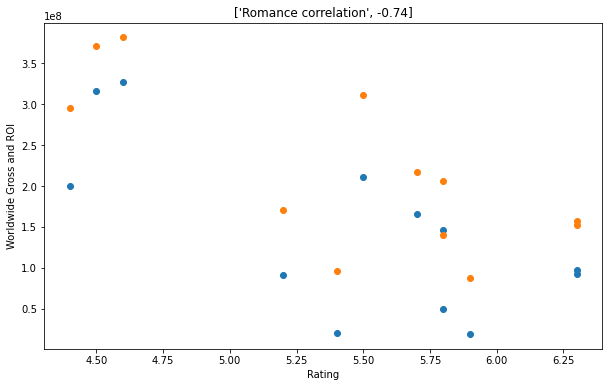

In [199]:
figure, ax = plt.subplots(figsize=(10, 6))
scatter_plot_title = 'Romance correlation'
rating_label = 'Rating'
metric_label = 'Profit'

ax.scatter(x= 'averagerating', y= 'profit', data = low_ranking[low_ranking['genres'] == 'Romance'])
ax.set_title([scatter_plot_title, low_ranking[low_ranking.genres=='Romance'].corr().loc['profit'][0].round(2)])
ax.set_ylabel(metric_label)
ax.set_xlabel(rating_label)

scatter_plot_title = 'Romance correlation'
rating_label = 'Rating'
metric_label = 'Worldwide Gross and ROI'

ax.scatter(x= 'averagerating', y= 'worldwide_gross', data = low_ranking[low_ranking['genres'] == 'Romance'])
ax.set_title([scatter_plot_title, low_ranking[low_ranking.genres=='Romance'].corr().loc['worldwide_gross'][0].round(2)])
ax.set_ylabel(metric_label)
ax.set_xlabel(rating_label)

In [196]:
low_ranking[low_ranking.genres=='Romance'].corr().loc['averagerating'].sort_values().round(2)
# .loc['profit'][0].round(2)

worldwide_gross     -0.74
profit              -0.70
roi                 -0.60
domestic_gross      -0.36
production_budget   -0.16
numvotes             0.81
averagerating        1.00
Name: averagerating, dtype: float64

In [178]:
low_ranking[low_ranking.genres=='Romance'].corr().loc['profit'][0].round(2)

-0.7